- # Project Title : Laptop Price Analysis
- # Project Difficulty Level : Advance

Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Creating data frame

In [2]:
df = pd.read_csv('Data/laptop_prices.csv')

In [3]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [4]:
## shape of the data
df.shape

(1275, 23)

In [5]:
## list of columns
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [6]:
## checking is there any null vlaues
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

**Observation** - There is no any null values in any column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [9]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [10]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [11]:
df['IPSpanel']

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
1270    Yes
1271    Yes
1272     No
1273     No
1274     No
Name: IPSpanel, Length: 1275, dtype: object

### Columns:
- **Numerical** - Inches, Ram, Weight, Price_euros, ScreenW, ScreenH, CPU_freq, Primary Storage, Secondary Storage
- **Categorical** - Company, Product, TypeName, OS, Screen, Touchscreen, IPSpanel, RetinaDisplay, CPU_company, CPU_model, PrimaryStorageType, SecondaryStorageType, GPU_company, GPU_model

## EDA and Feature Engineering

In [12]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [13]:
####### Company #######

In [14]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [15]:
df['Company'].nunique()

19

**Observation** - There are 19 unique companies

<Axes: xlabel='Company'>

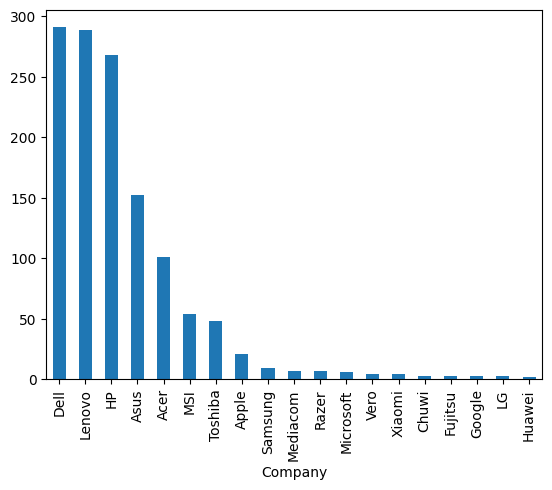

In [16]:
### bar plot for company names
df['Company'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

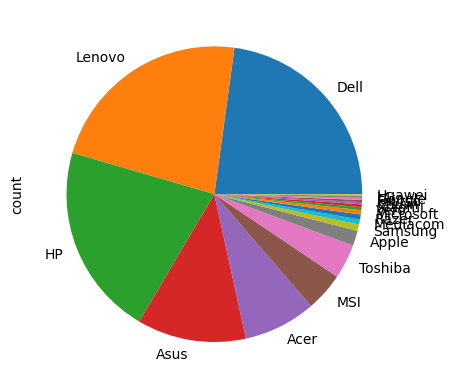

In [17]:
### pie chart for company names
df['Company'].value_counts().plot(kind='pie')

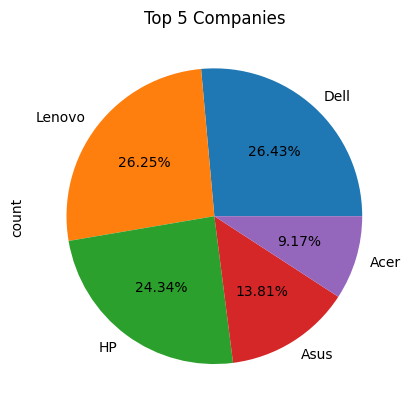

In [18]:
### pie chart for top 5 companies
df['Company'].value_counts()[:5].plot(kind='pie', autopct='%.2f%%')
plt.title("Top 5 Companies")
plt.show()

**Observation**
- Top 3 Companies are
- 1. Here the highest % is of *Dell* : 26.43%
- 2. *Lenovo* : 26.25%
- 3. *HP* : 24.34%

In [19]:
##### Product #####

In [20]:
df['Product'].value_counts()

Product
XPS 13                                   30
Inspiron 3567                            25
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
X541NA-GO020T (N3350/4GB/1TB/W10)         1
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
Name: count, Length: 618, dtype: int64

In [21]:
df.head(3)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620


<Axes: xlabel='Product'>

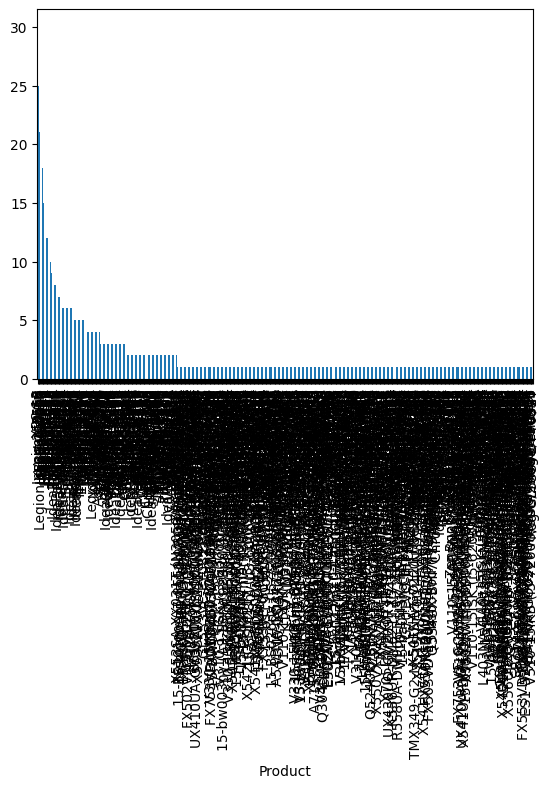

In [22]:
### bar plot for Product
df['Product'].value_counts().plot(kind='bar')

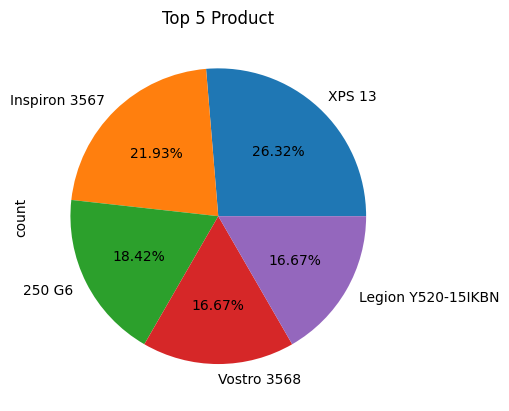

In [23]:
### pie chart for top 5 Product
df['Product'].value_counts()[:5].plot(kind='pie', autopct='%.2f%%')
plt.title("Top 5 Product")
plt.show()

**Observation**
- Here top 3 Products are:
- 1. XPS 13
- 2. Inspiron 3567
- 3. 250 G6

In [24]:
###### TypeName ########

In [25]:
df['TypeName'].value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

**Observation** - There are 6 different types.

<Axes: xlabel='TypeName'>

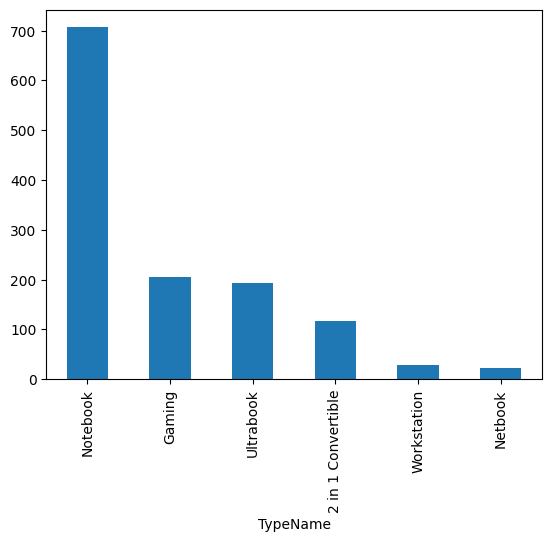

In [26]:
#### bar plot for TypeName
df['TypeName'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

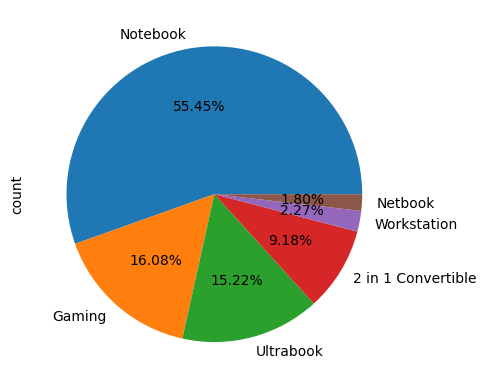

In [27]:
### pie chart for TypeName
df['TypeName'].value_counts().plot(kind='pie', autopct='%.2f%%')

**Observation**
- Here top 3 types are
1. Notebook
2. Gaming
3. Ultrabook

In [28]:
####### Inches #########

In [29]:
df['Inches'].describe()

count    1275.000000
mean       15.022902
std         1.429470
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

<Axes: ylabel='Frequency'>

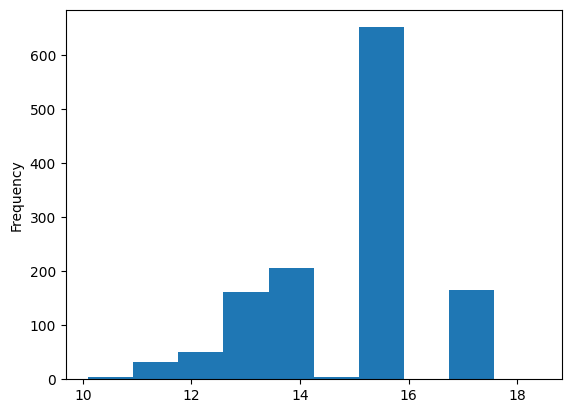

In [30]:
df['Inches'].plot(kind='hist')

**Observation** - Here 16 inch size is occuring highest

<Axes: ylabel='Density'>

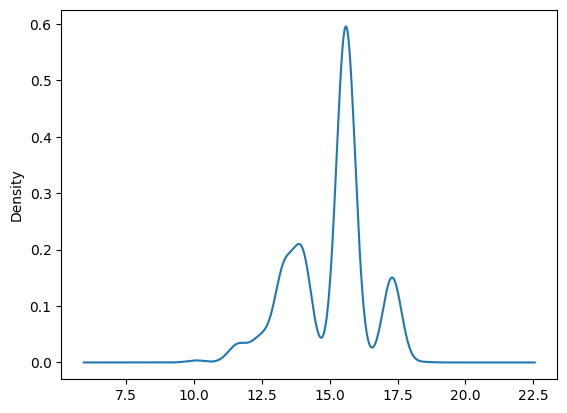

In [31]:
df['Inches'].plot(kind='kde')

In [32]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

<Axes: >

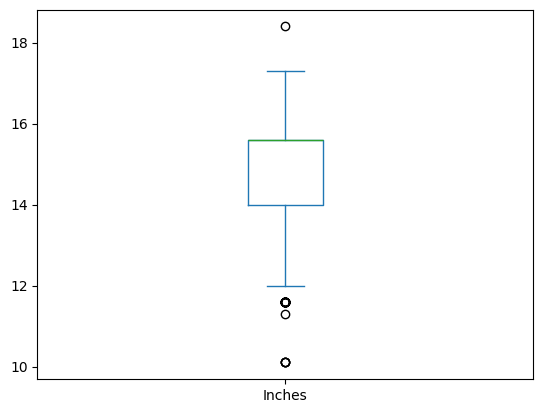

In [33]:
df['Inches'].plot(kind='box')

**Observation** - Here it is showing inch size less than 12 and greater than 17 as outliers. But we can remove them as outliers this is occuring because most of the values are between them.

In [34]:
df[df['Inches']>17]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
29,HP,ProBook 470,Notebook,17.3,8,Windows 10,2.50,896.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,1024,0,HDD,No,Nvidia,GeForce 930MX
32,HP,17-ak001nv (A6-9220/4GB/500GB/Radeon,Notebook,17.3,4,Windows 10,2.71,439.0,Full HD,1920,...,No,AMD,2.5,A6-Series 9220,500,0,HDD,No,AMD,Radeon 530
37,Dell,Inspiron 5770,Notebook,17.3,8,Windows 10,2.80,979.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,128,1024,SSD,HDD,AMD,Radeon 530
44,Dell,Inspiron 7773,2 in 1 Convertible,17.3,12,Windows 10,2.77,999.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,1024,0,HDD,No,Nvidia,GeForce 150MX
47,Asus,Rog Strix,Gaming,17.3,8,Windows 10,3.20,1299.0,Full HD,1920,...,No,AMD,3.0,Ryzen 1700,256,1024,SSD,HDD,AMD,Radeon RX 580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Acer,E5 774G,Notebook,17.3,4,Windows 10,3.30,598.0,Standard,1600,...,No,Intel,2.0,Core i3 6006U,1024,0,HDD,No,Nvidia,GeForce 940MX
1217,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,8,No OS,2.80,539.0,Standard,1600,...,No,Intel,2.5,Core i5 7200U,1024,0,HDD,No,Intel,HD Graphics 620
1233,MSI,GE72VR Apache,Gaming,17.3,16,Windows 10,2.70,1598.0,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,256,1024,SSD,HDD,Nvidia,GeForce GTX 1060
1243,Dell,Inspiron 7779,2 in 1 Convertible,17.3,16,Windows 10,2.77,1799.0,Full HD,1920,...,No,Intel,2.7,Core i7 7500U,512,0,SSD,No,Nvidia,GeForce 940MX


In [35]:
df[df['Inches']<12]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
20,Asus,Vivobook E200HA,Netbook,11.6,2,Windows 10,0.98,191.90,Standard,1366,...,No,Intel,1.44,Atom x5-Z8350,32,0,Flash Storage,No,Intel,HD Graphics 400
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,4,Android,0.69,319.00,Standard,1920,...,No,Intel,1.44,Atom x5-Z8550,64,0,Flash Storage,No,Intel,HD Graphics 400
314,Asus,VivoBook Flip,2 in 1 Convertible,11.6,2,Windows 10,1.10,275.00,Standard,1366,...,No,Intel,1.10,Celeron Dual Core N3350,32,0,Flash Storage,No,Intel,HD Graphics 500
319,Acer,TravelMate B,Notebook,11.6,4,Windows 10,1.40,485.00,Standard,1366,...,No,Intel,1.60,Pentium Quad Core N3710,128,0,Flash Storage,No,Intel,HD Graphics 405
348,Asus,VivoBook Flip,2 in 1 Convertible,11.6,4,Windows 10,1.50,375.00,Standard,1366,...,No,Intel,1.10,Celeron Dual Core N3350,32,0,Flash Storage,No,Intel,HD Graphics 500
376,Lenovo,Yoga 11e,Netbook,11.6,4,Windows 10,1.59,553.00,Standard,1366,...,No,Intel,1.10,Celeron Quad Core N3450,128,0,SSD,No,Intel,HD Graphics 500
409,Lenovo,Lenovo IdeaPad,Notebook,11.6,2,Windows 10,1.15,304.45,Standard,1366,...,No,Intel,1.10,Celeron Dual Core N3350,32,0,Flash Storage,No,Intel,HD Graphics 500
429,Mediacom,FlexBook Edge,2 in 1 Convertible,11.6,4,Windows 10,1.16,299.00,Full HD,1920,...,No,Intel,1.10,Celeron Dual Core N3350,32,0,SSD,No,Intel,HD Graphics 500
430,Samsung,Chromebook 3,Netbook,11.6,4,Chrome OS,1.15,269.00,Standard,1366,...,No,Intel,1.60,Celeron Dual Core N3060,16,0,Flash Storage,No,Intel,HD Graphics 400
455,Dell,Inspiron 3168,2 in 1 Convertible,11.6,4,Windows 10,1.47,479.00,Standard,1366,...,No,Intel,1.60,Pentium Quad Core N3710,500,0,HDD,No,Intel,HD Graphics 405


In [36]:
#### Ram #####

In [37]:
df['Ram'].describe()

count    1275.000000
mean        8.440784
std         5.097809
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

In [38]:
df['Ram'].value_counts()

Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

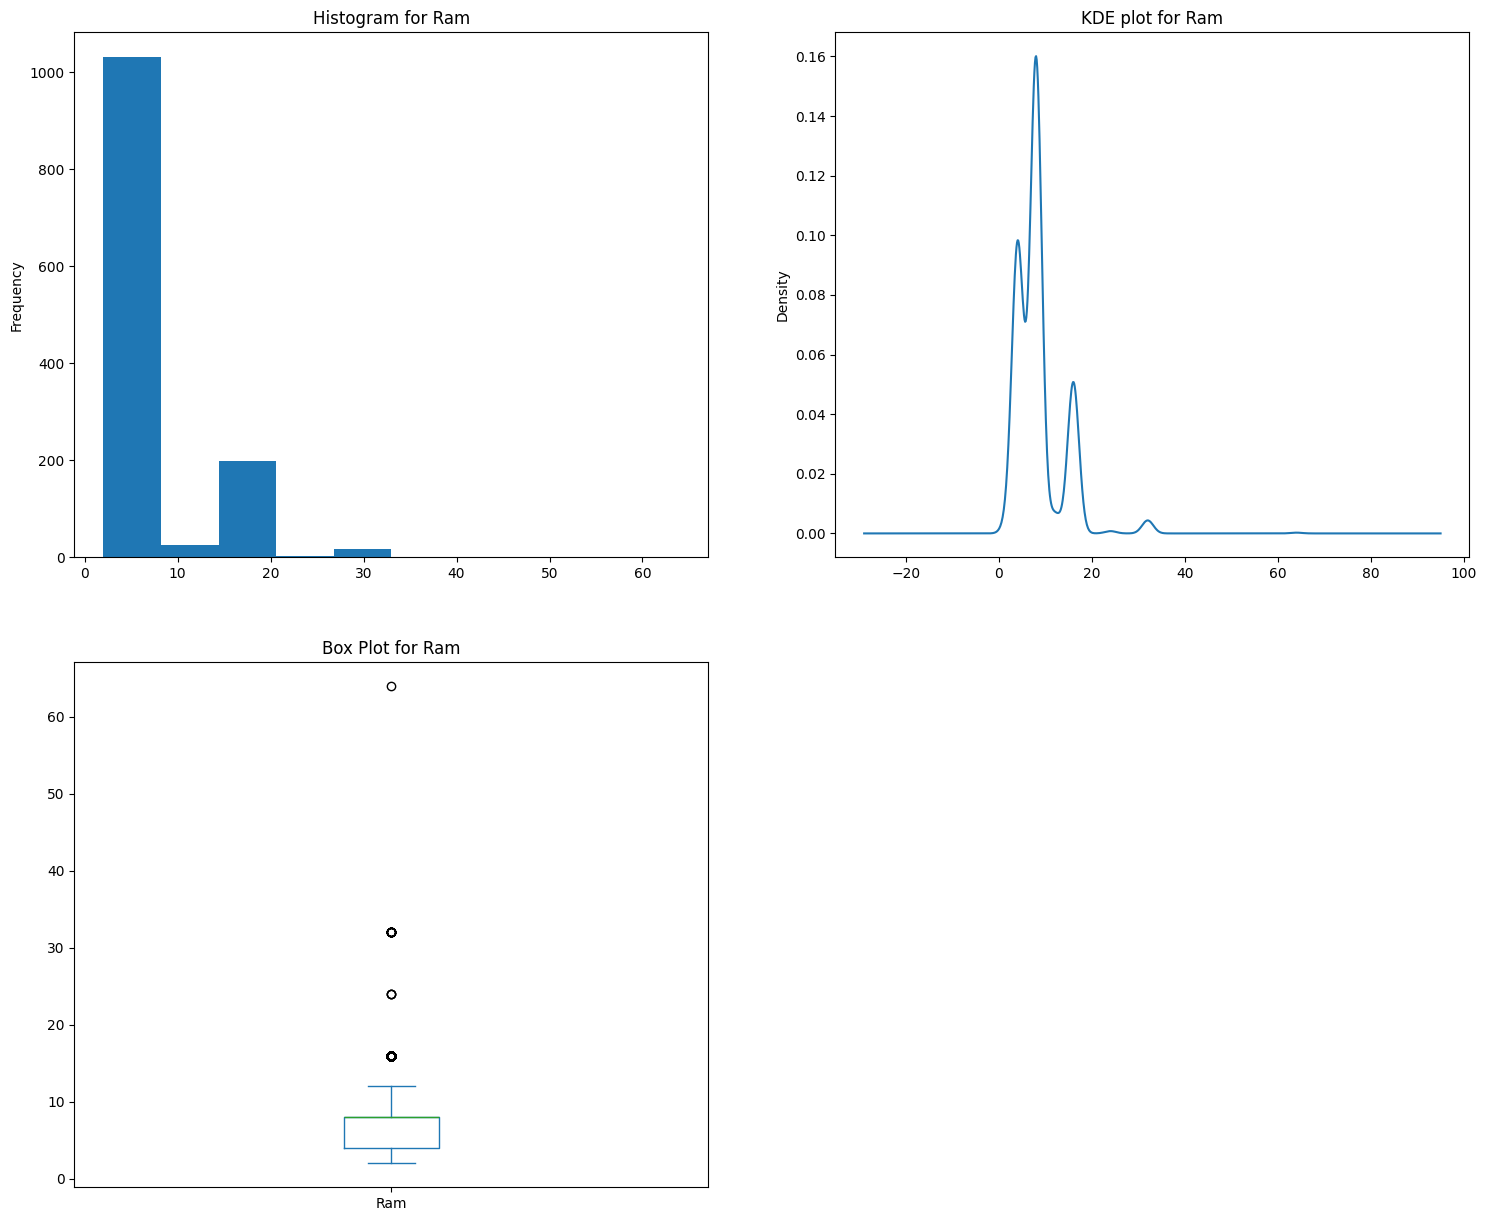

In [39]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for Ram")
df['Ram'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for Ram")
df['Ram'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for Ram")
df['Ram'].plot(kind='box')

plt.show()

**Observation**
- Here most of Ram size is less than 10
- There are very less entries where Ram size is 64
- Ram size of 8 is most frequent

In [40]:
######## OS ########

In [41]:
df['OS'].value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

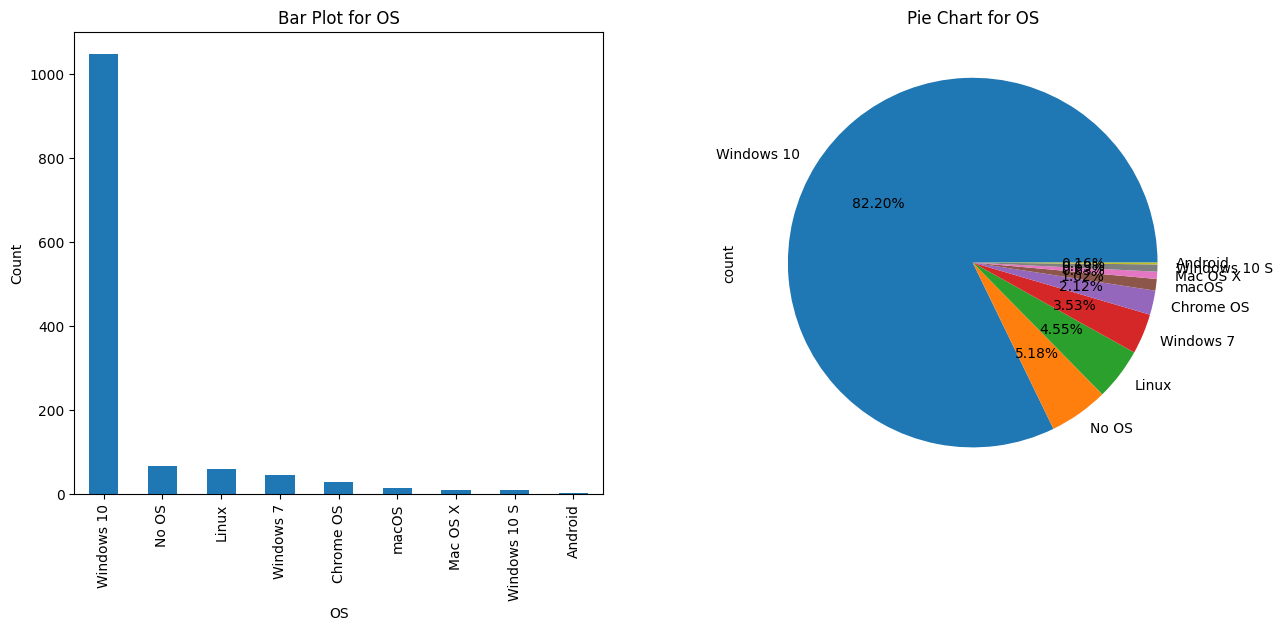

In [42]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for OS")
plt.ylabel("Count")
df['OS'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for OS")
df['OS'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

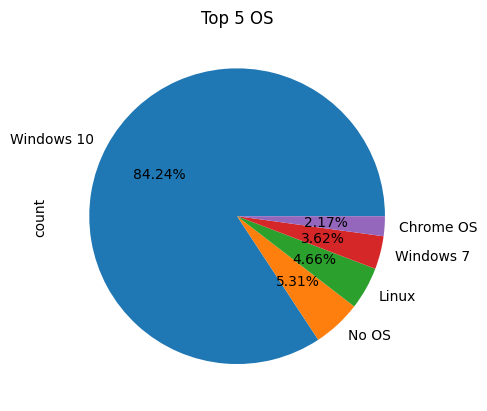

In [43]:
df['OS'].value_counts()[:5].plot(kind='pie', autopct='%.2f%%') ## pie chart for top 5 OS
plt.title("Top 5 OS")
plt.show()

**Observation**
- Here top 5 OS are
1. Windows 10 (84%)
2. No OS
3. Linux
4. Windows 7
5. Chrome OS

In [44]:
###### Weight ########

In [45]:
df['Weight'].describe()

count    1275.000000
mean        2.040525
std         0.669196
min         0.690000
25%         1.500000
50%         2.040000
75%         2.310000
max         4.700000
Name: Weight, dtype: float64

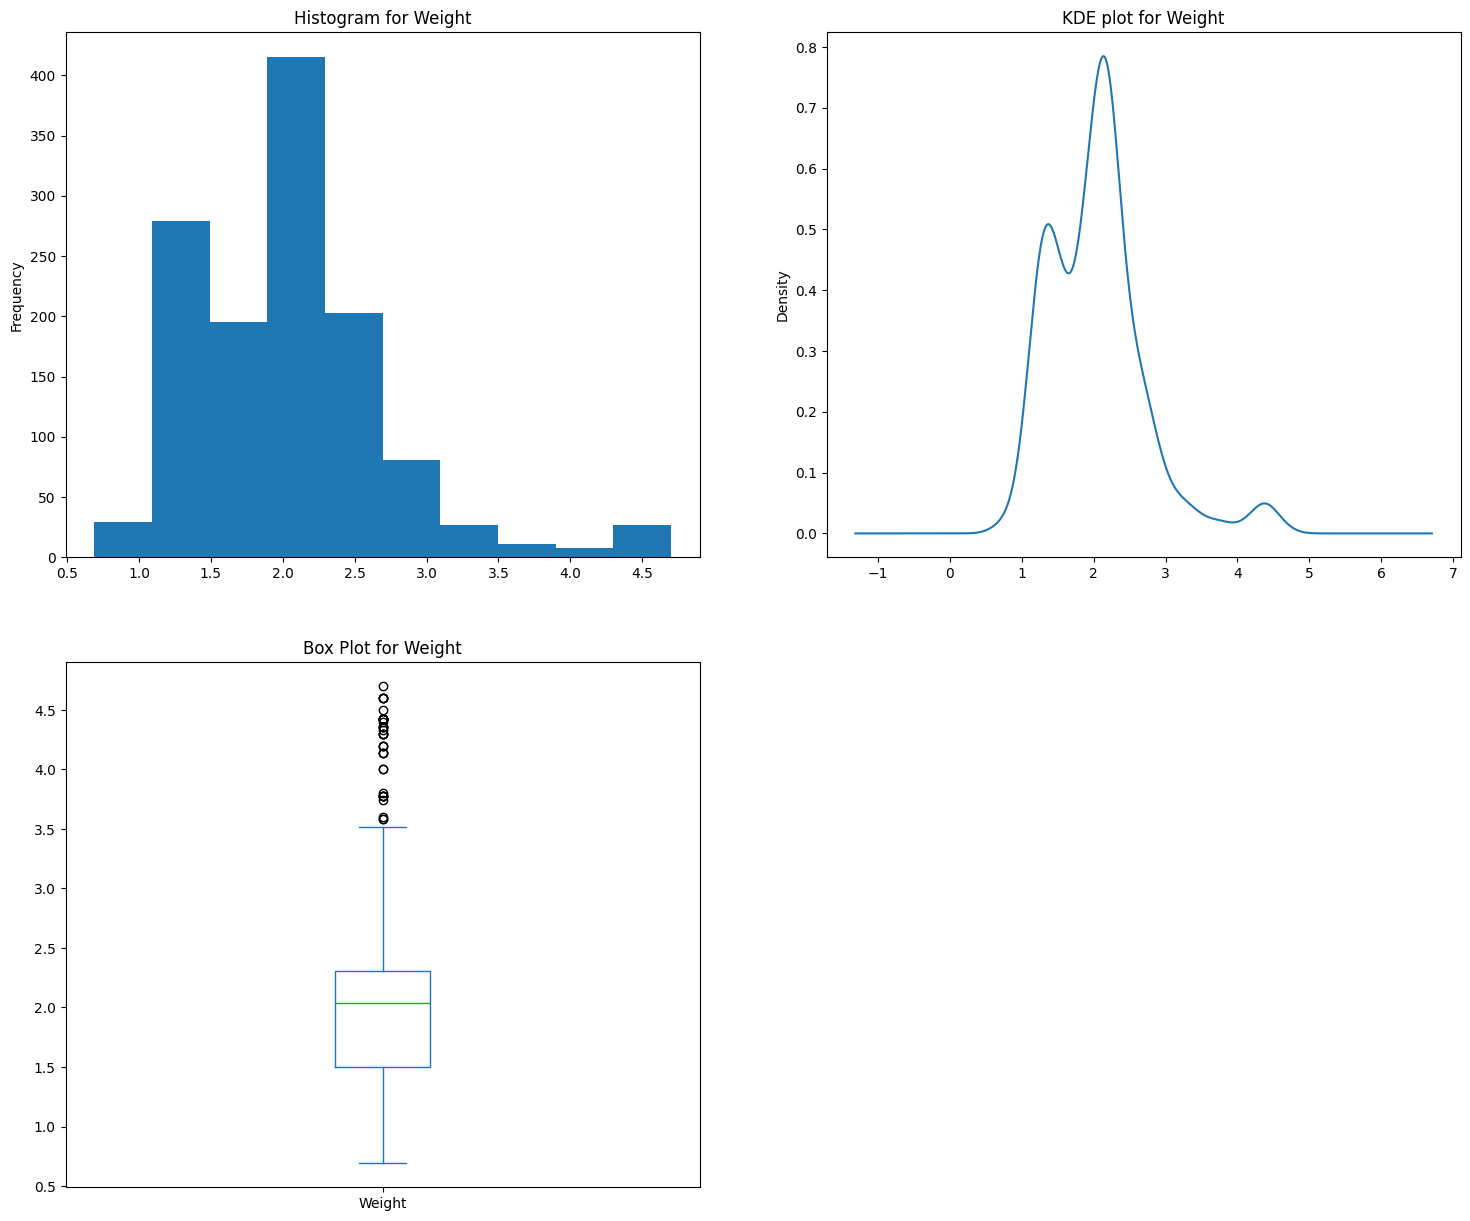

In [46]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for Weight")
df['Weight'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for Weight")
df['Weight'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for Weight")
df['Weight'].plot(kind='box')

plt.show()

**Observation**
- Here the most of weigh lies between 1.2 to 2.6

In [47]:
######## Price_euros #########

In [48]:
df['Price_euros']  #### This is our target feature

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [49]:
########## Screen ##########

In [50]:
df['Screen'].dtype

dtype('O')

In [51]:
df['Screen'].value_counts()

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

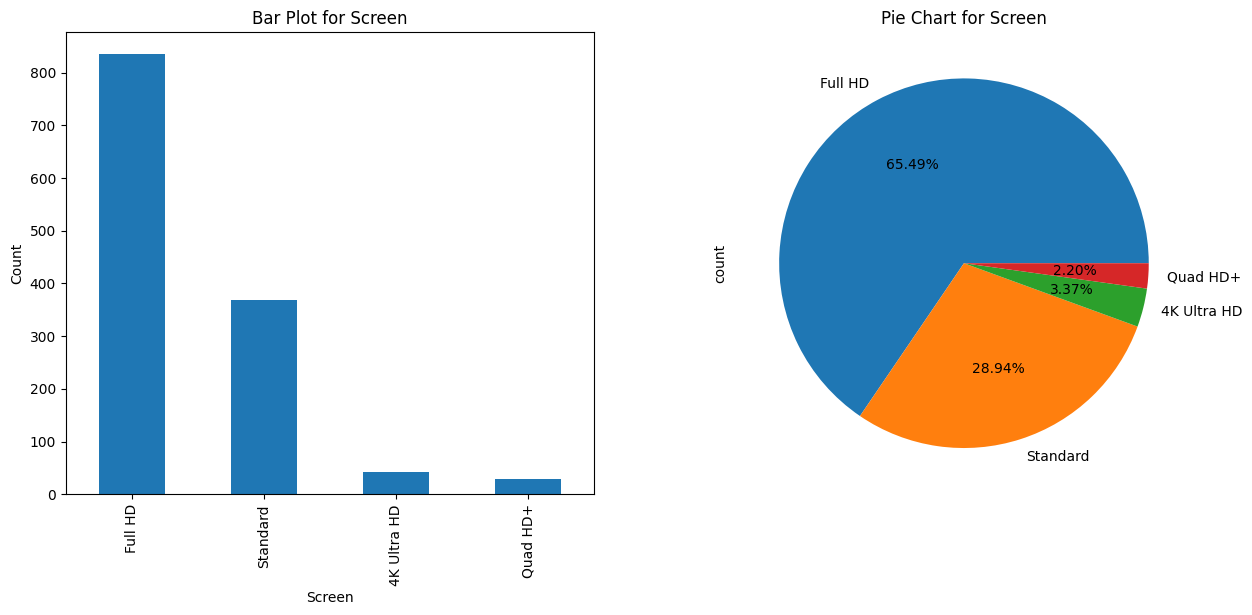

In [52]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for Screen")
plt.ylabel("Count")
df['Screen'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for Screen")
df['Screen'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

**Observation**
- Full HD (65%)
- Standard (28%)

In [53]:
######### ScreenW ##########

In [54]:
df['ScreenW'].describe()

count    1275.000000
mean     1900.043922
std       493.346186
min      1366.000000
25%      1920.000000
50%      1920.000000
75%      1920.000000
max      3840.000000
Name: ScreenW, dtype: float64

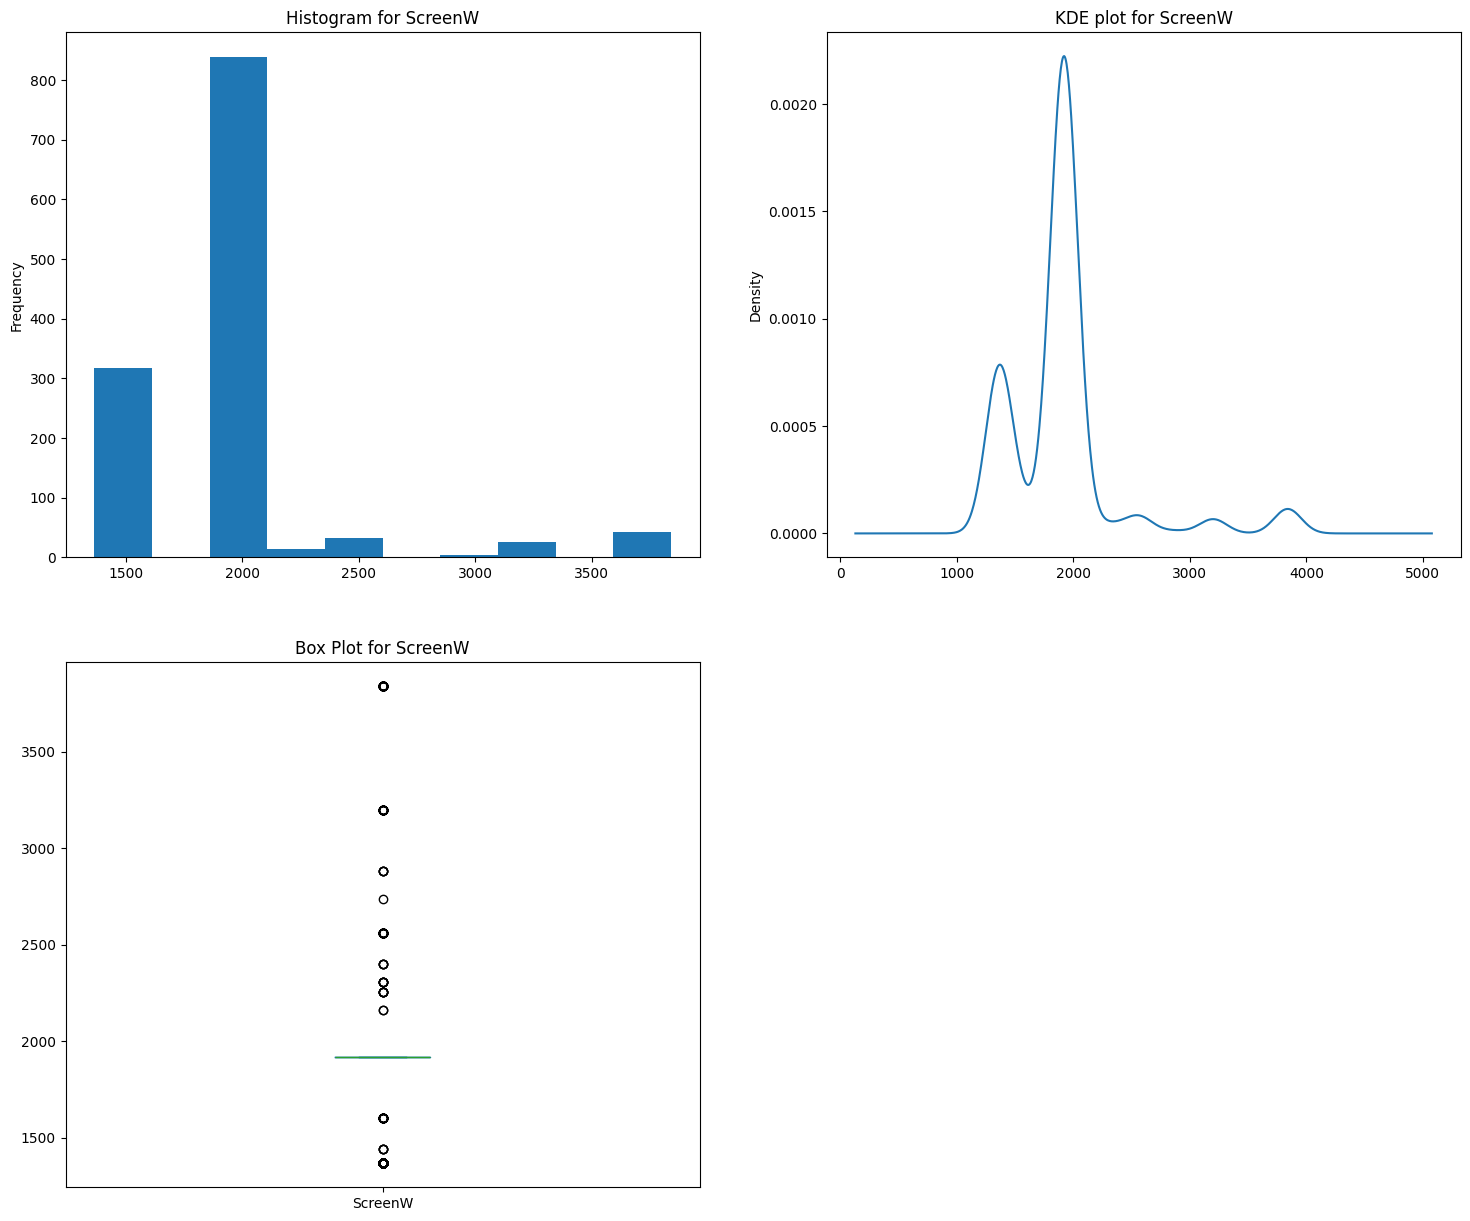

In [55]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for ScreenW")
df['ScreenW'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for ScreenW")
df['ScreenW'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for ScreenW")
df['ScreenW'].plot(kind='box')

plt.show()

In [56]:
######### ScreenH ##########

In [57]:
df['ScreenH'].describe()

count    1275.000000
mean     1073.904314
std       283.883940
min       768.000000
25%      1080.000000
50%      1080.000000
75%      1080.000000
max      2160.000000
Name: ScreenH, dtype: float64

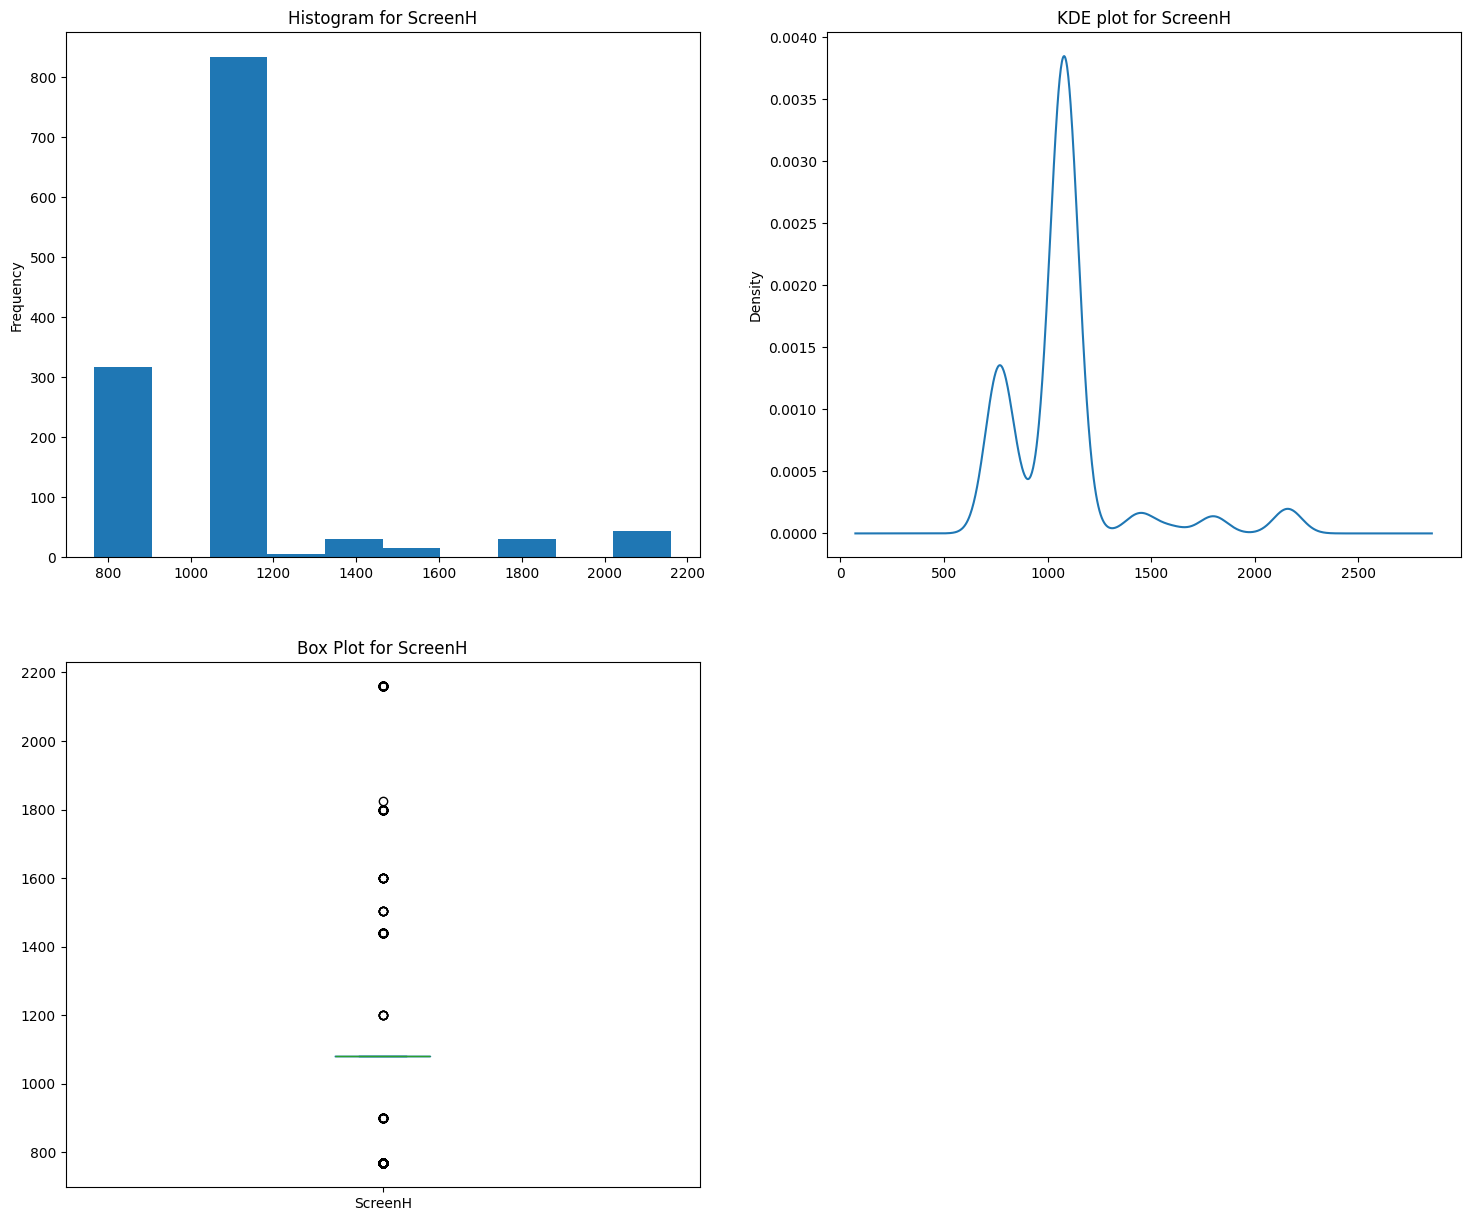

In [58]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for ScreenH")
df['ScreenH'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for ScreenH")
df['ScreenH'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for ScreenH")
df['ScreenH'].plot(kind='box')

plt.show()

In [59]:
######### Touchscreen ##############

In [60]:
df['Touchscreen'].value_counts()

Touchscreen
No     1087
Yes     188
Name: count, dtype: int64

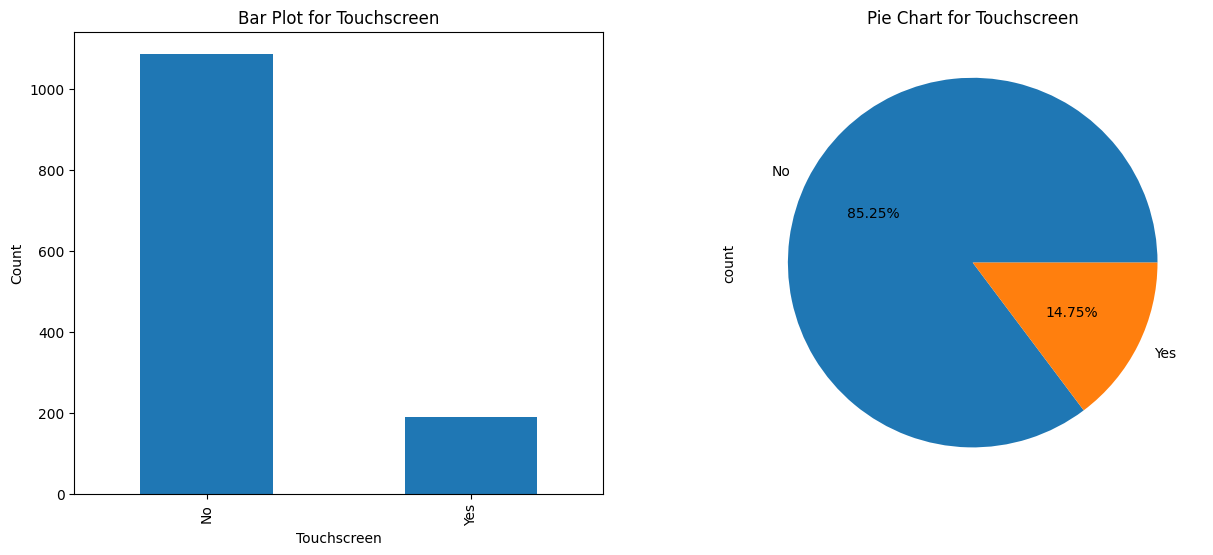

In [61]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for Touchscreen")
plt.ylabel("Count")
df['Touchscreen'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for Touchscreen")
df['Touchscreen'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

**Observation**
- Here Most of the Laptop are Non Touch Screen (85%) and only 14% are TouchScreen

In [62]:
########### IPSpanel ############

In [63]:
df['IPSpanel'].value_counts()

IPSpanel
No     918
Yes    357
Name: count, dtype: int64

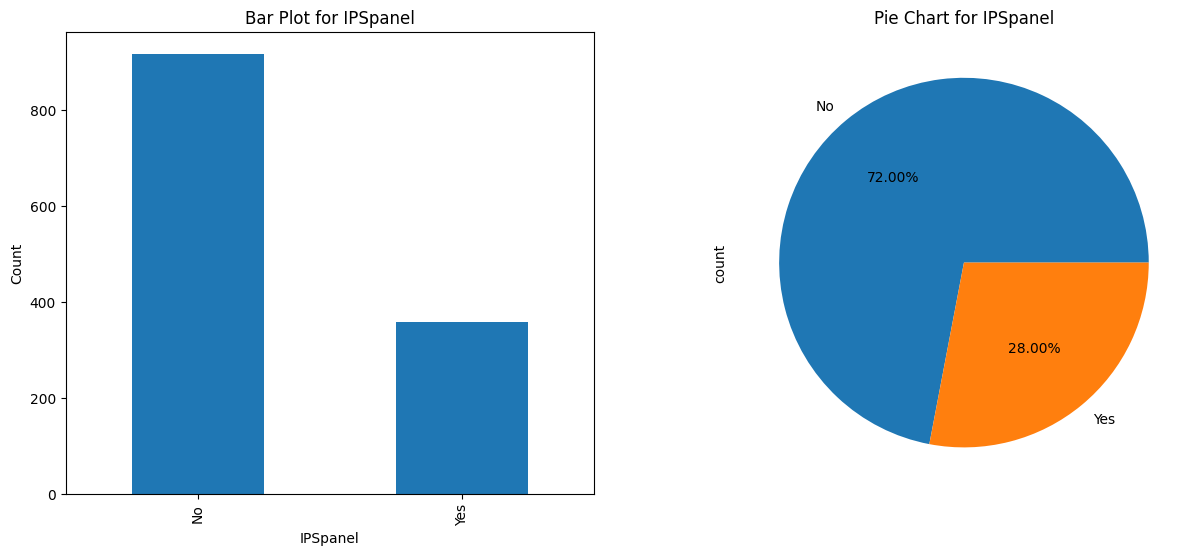

In [64]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for IPSpanel")
plt.ylabel("Count")
df['IPSpanel'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for IPSpanel")
df['IPSpanel'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

In [65]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [66]:
########## RetinaDisplay ##########

In [67]:
df['RetinaDisplay'].dtype

dtype('O')

In [68]:
df['RetinaDisplay'].value_counts()

RetinaDisplay
No     1258
Yes      17
Name: count, dtype: int64

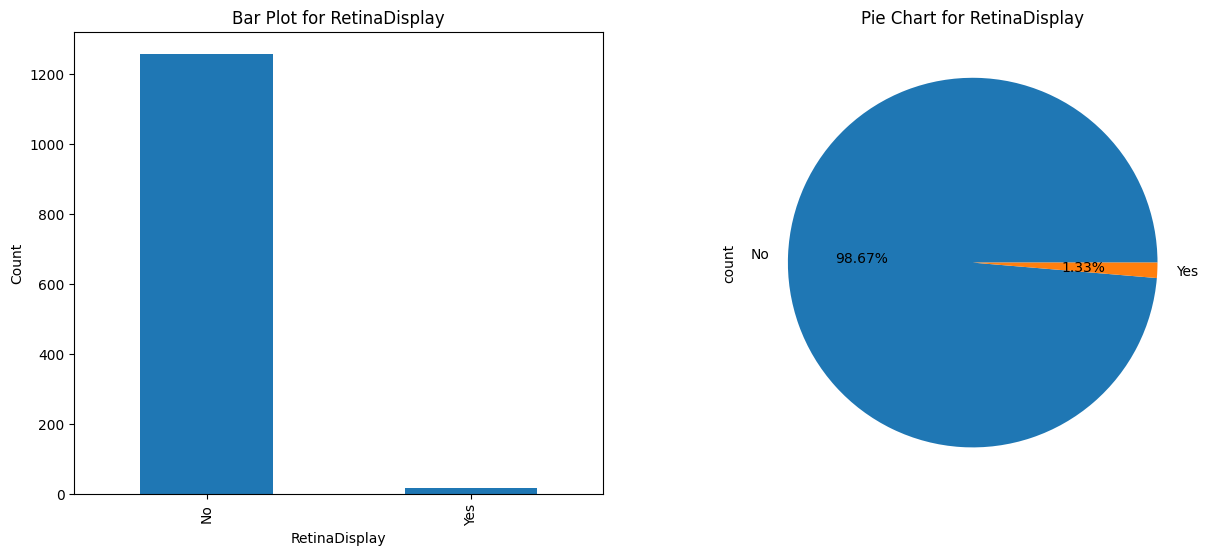

In [69]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for RetinaDisplay")
plt.ylabel("Count")
df['RetinaDisplay'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for RetinaDisplay")
df['RetinaDisplay'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

**Observation**
- No (98%)
- Yes (1.33%)

In [70]:
######## CPU_company #########

In [71]:
df['CPU_company'].dtype

dtype('O')

In [72]:
df['CPU_company'].value_counts()

CPU_company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64

In [73]:
## here the Samsung is only 1 time so we can drop it

In [74]:
df[df['CPU_company']=='Samsung']

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,4,Chrome OS,1.15,659.0,Standard,2400,...,No,Samsung,2.0,Cortex A72&A53,32,0,Flash Storage,No,ARM,Mali T860 MP4


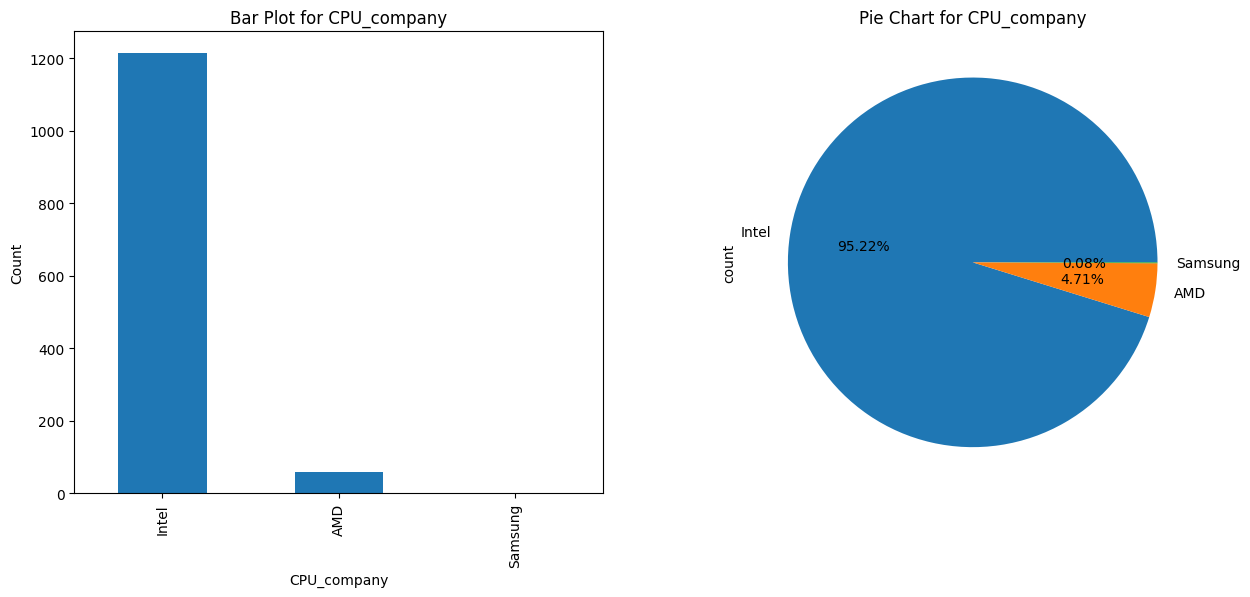

In [75]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for CPU_company")
plt.ylabel("Count")
df['CPU_company'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for CPU_company")
df['CPU_company'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

In [76]:
######## CPU_model ##########3

In [77]:
df['CPU_model'].value_counts()

CPU_model
Core i5 7200U     193
Core i7 7700HQ    147
Core i7 7500U     133
Core i3 6006U      81
Core i7 8550U      73
                 ... 
Core M 6Y54         1
Cortex A72&A53      1
E-Series 9000       1
Core M 6Y30         1
A9-Series 9410      1
Name: count, Length: 93, dtype: int64

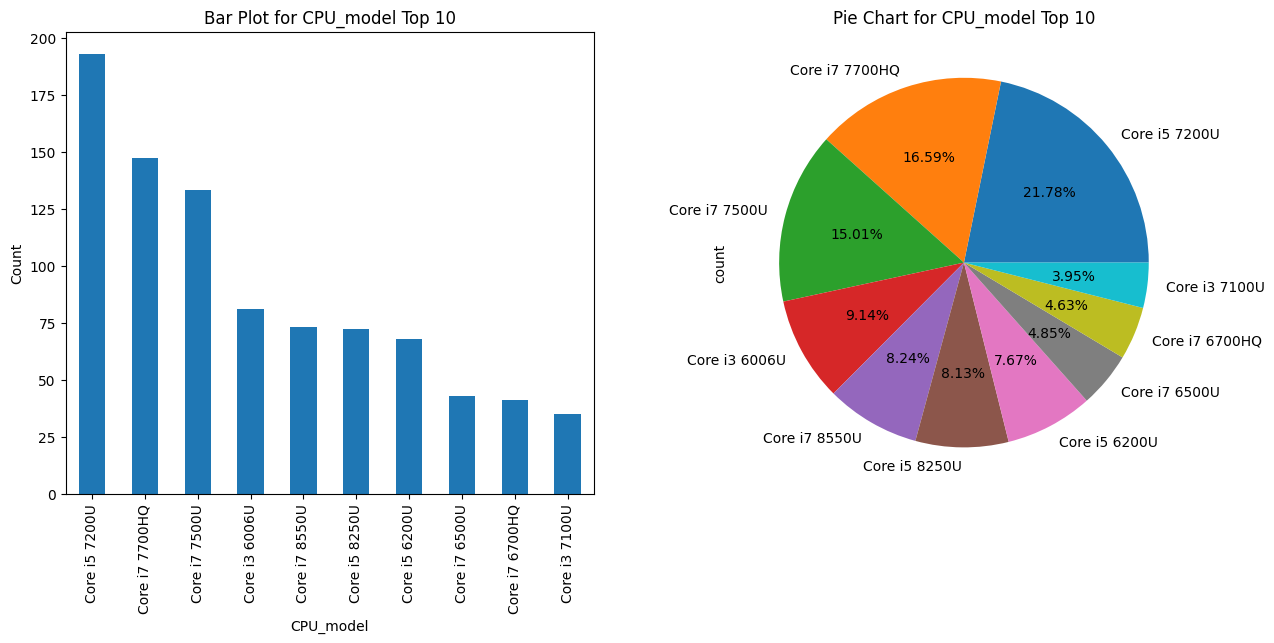

In [78]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for CPU_model Top 10")
plt.ylabel("Count")
df['CPU_model'].value_counts()[:10].plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for CPU_model Top 10")
df['CPU_model'].value_counts()[:10].plot(kind='pie', autopct='%.2f%%')

plt.show()

In [79]:
######## CPU_freq ##########

In [80]:
df['CPU_freq'].describe()

count    1275.000000
mean        2.302980
std         0.503846
min         0.900000
25%         2.000000
50%         2.500000
75%         2.700000
max         3.600000
Name: CPU_freq, dtype: float64

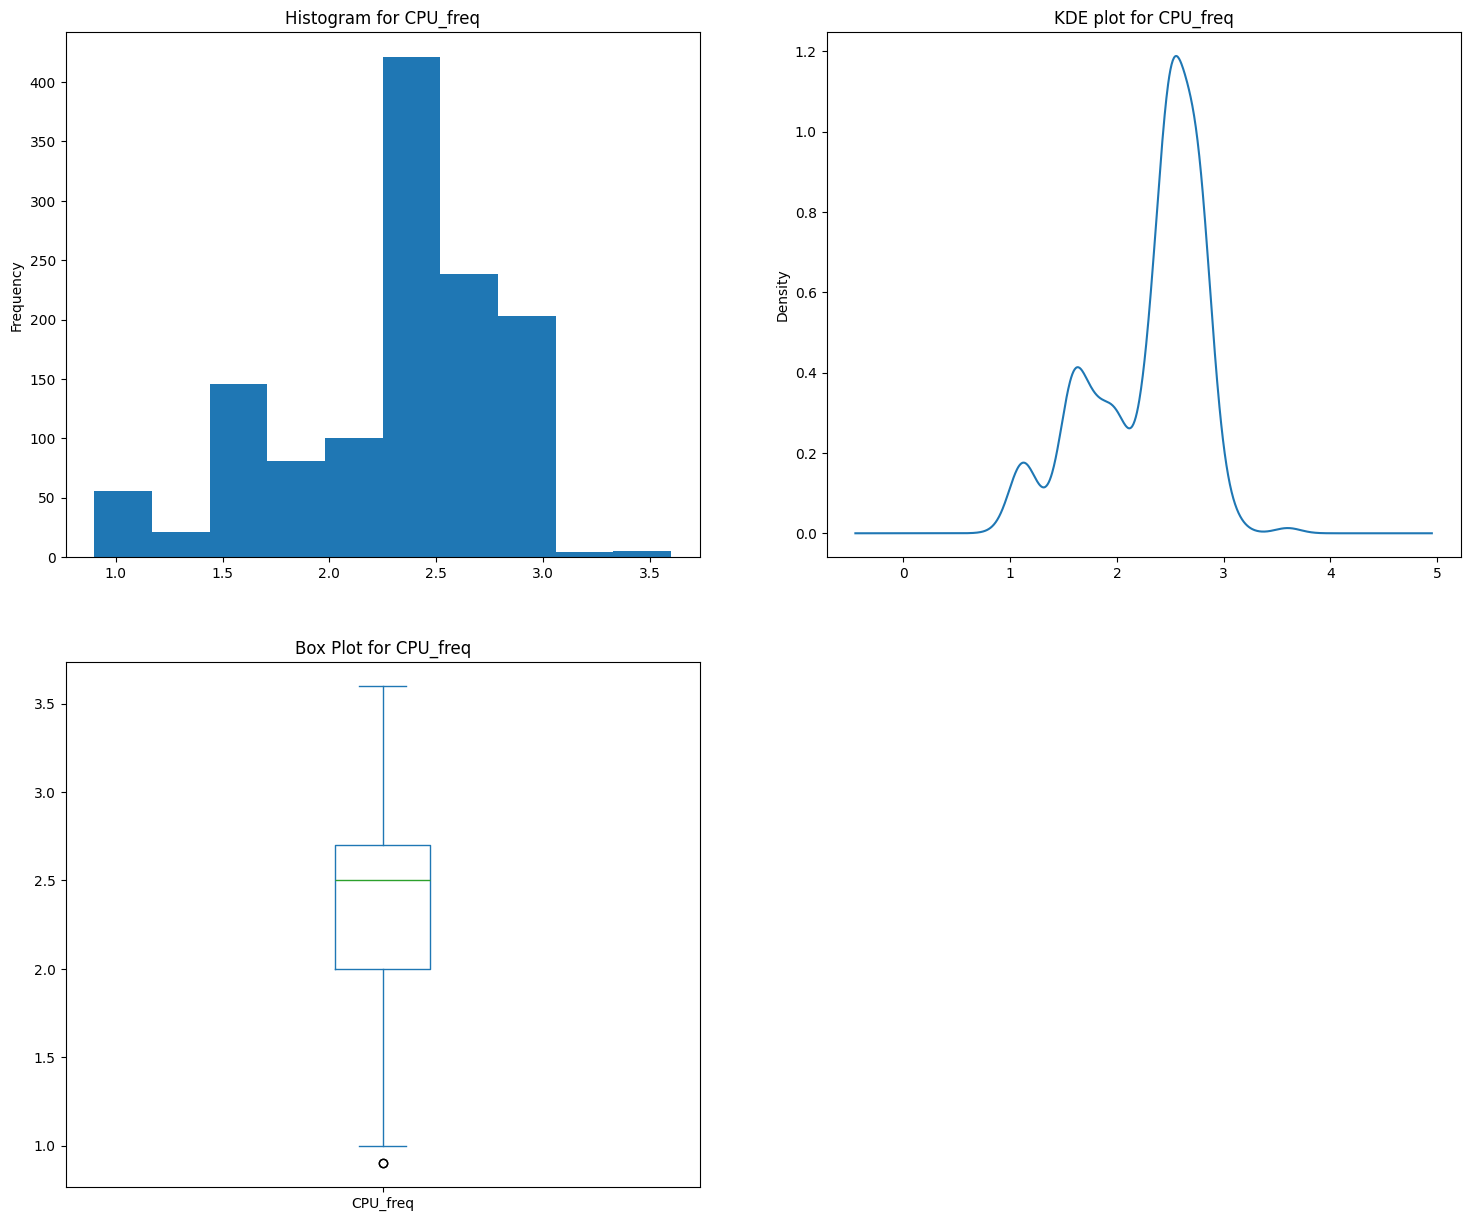

In [81]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for CPU_freq")
df['CPU_freq'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for CPU_freq")
df['CPU_freq'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for CPU_freq")
df['CPU_freq'].plot(kind='box')

plt.show()

In [82]:
########## PrimaryStorage ##############

In [83]:
df['PrimaryStorage'].describe()

count    1275.000000
mean      444.517647
std       365.537726
min         8.000000
25%       256.000000
50%       256.000000
75%       512.000000
max      2048.000000
Name: PrimaryStorage, dtype: float64

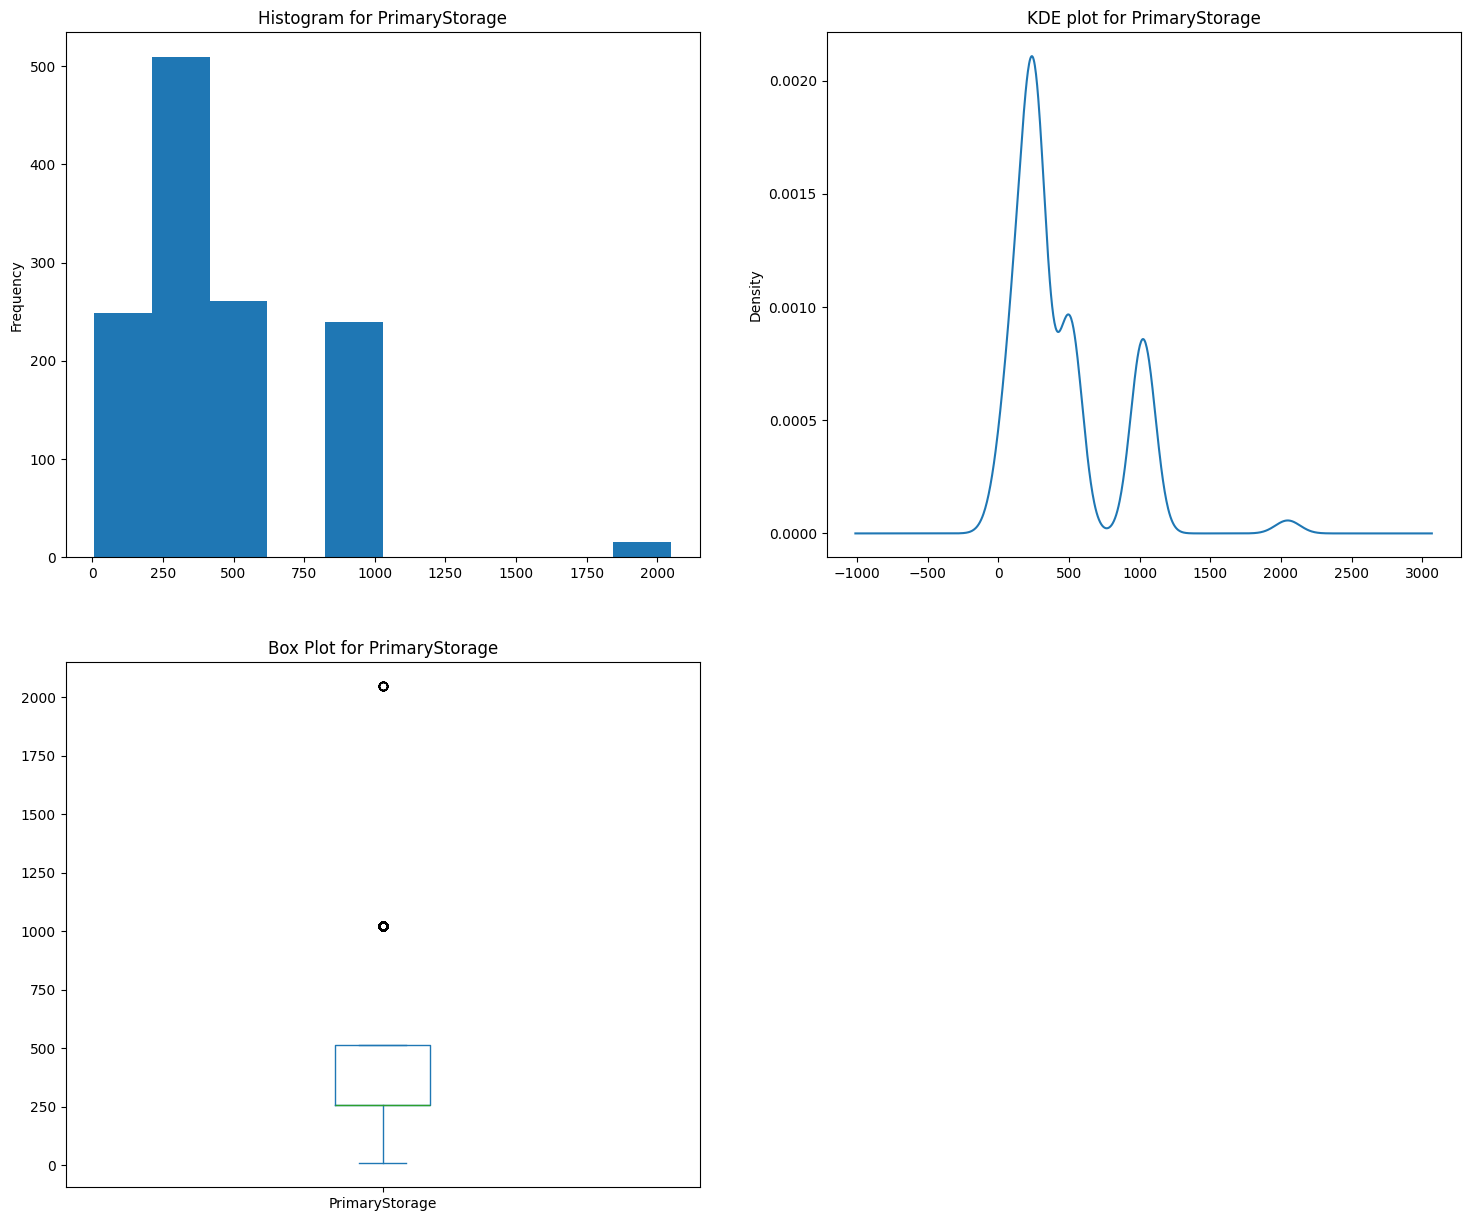

In [84]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for PrimaryStorage")
df['PrimaryStorage'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for PrimaryStorage")
df['PrimaryStorage'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for PrimaryStorage")
df['PrimaryStorage'].plot(kind='box')

plt.show()

In [85]:
######### SecondaryStorage #############

In [86]:
df['SecondaryStorage'].describe()

count    1275.000000
mean      176.069020
std       415.960655
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2048.000000
Name: SecondaryStorage, dtype: float64

In [87]:
df['SecondaryStorage'].value_counts()

SecondaryStorage
0       1067
1024     187
2048      15
256        3
500        2
512        1
Name: count, dtype: int64

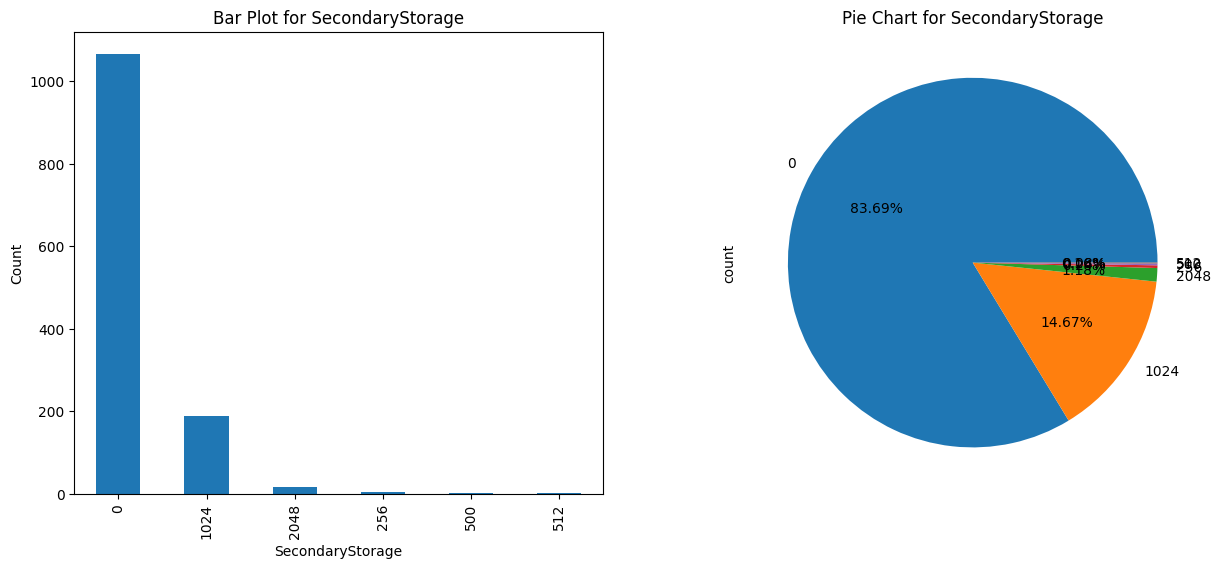

In [88]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for SecondaryStorage")
plt.ylabel("Count")
df['SecondaryStorage'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for SecondaryStorage")
df['SecondaryStorage'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

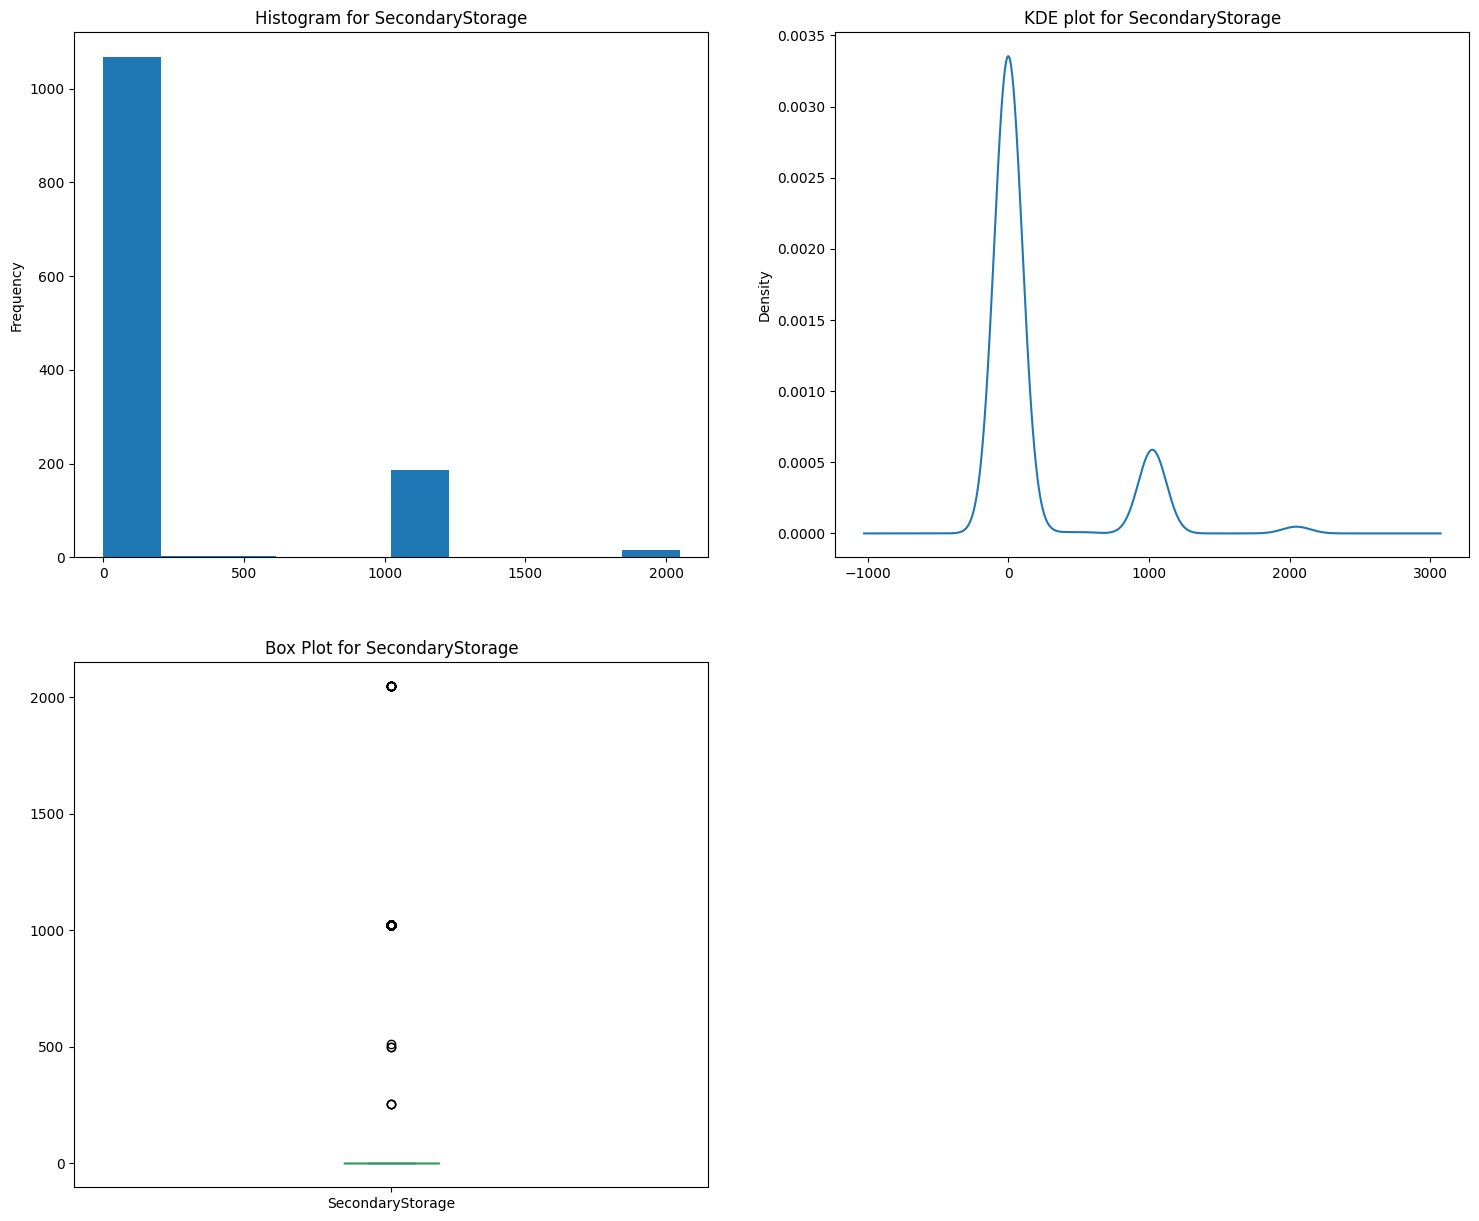

In [89]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.title("Histogram for SecondaryStorage")
df['SecondaryStorage'].plot(kind='hist')

plt.subplot(2,2,2)
plt.title("KDE plot for SecondaryStorage")
df['SecondaryStorage'].plot(kind='kde')

plt.subplot(2,2,3)
plt.title("Box Plot for SecondaryStorage")
df['SecondaryStorage'].plot(kind='box')

plt.show()

In [90]:
########## PrimaryStorageType ##########

In [91]:
df['PrimaryStorageType'].value_counts()

PrimaryStorageType
SSD              837
HDD              359
Flash Storage     71
Hybrid             8
Name: count, dtype: int64

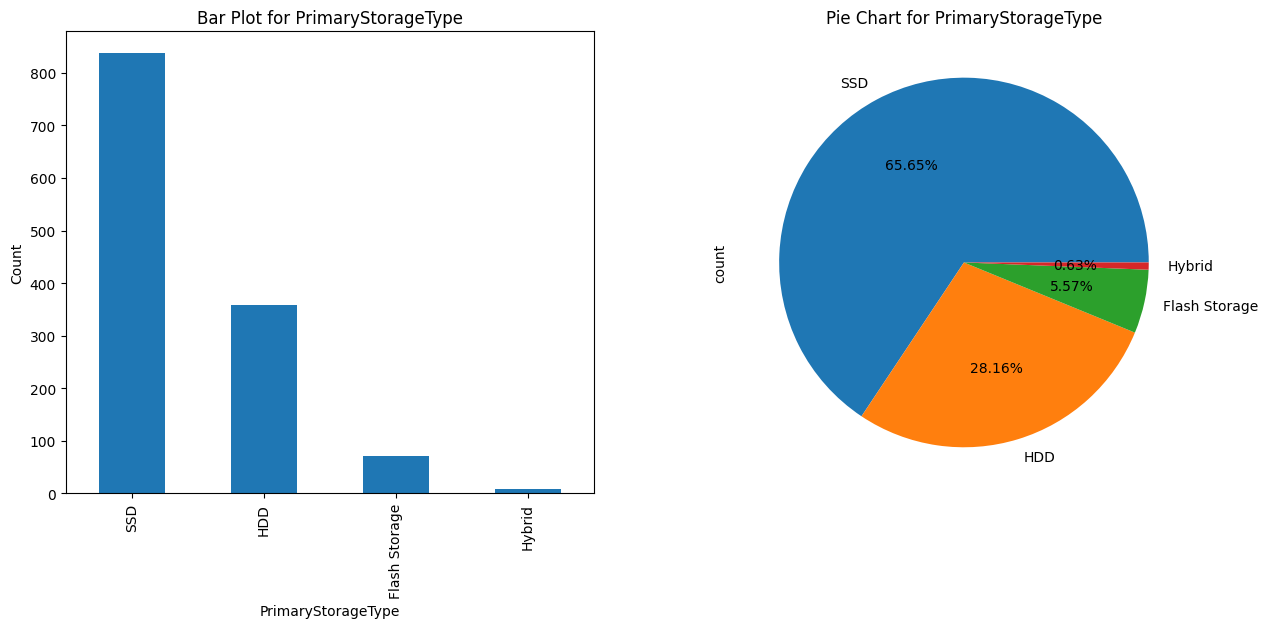

In [92]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for PrimaryStorageType")
plt.ylabel("Count")
df['PrimaryStorageType'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for PrimaryStorageType")
df['PrimaryStorageType'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

**Observation**
- SSD has highest frequency (65%)
- HDD  (28%)
- Flash Storage  (5.5%)
- Hybrid  (0.63%)

In [93]:
########## SecondaryStorageType ###############

In [94]:
df['SecondaryStorageType'].dtype

dtype('O')

In [95]:
df['SecondaryStorageType'].value_counts()

SecondaryStorageType
No        1067
HDD        202
SSD          4
Hybrid       2
Name: count, dtype: int64

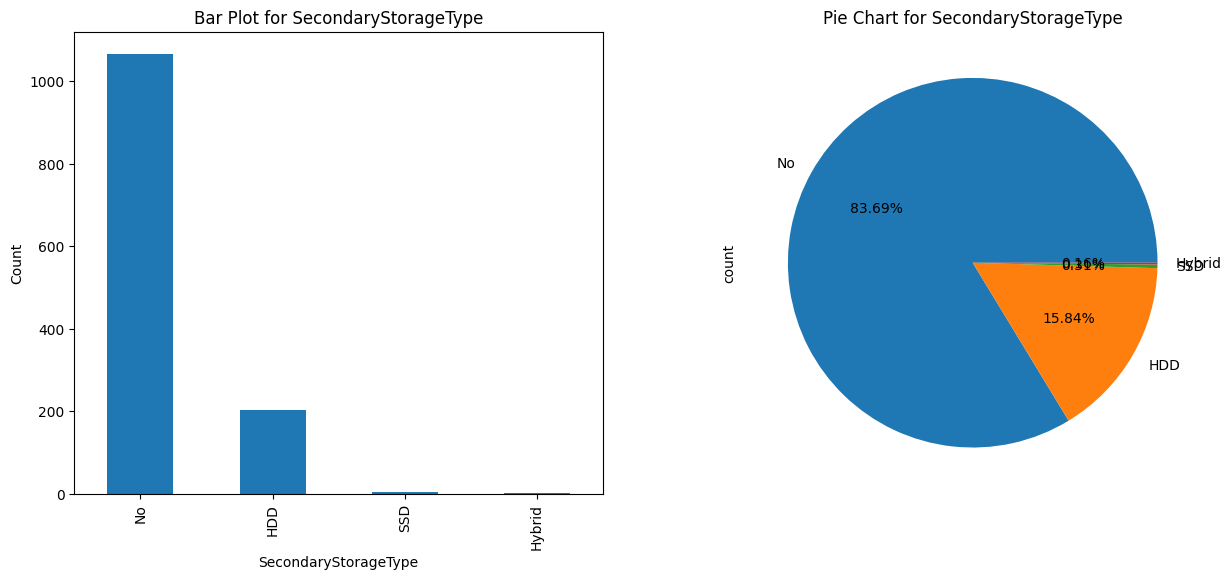

In [96]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for SecondaryStorageType")
plt.ylabel("Count")
df['SecondaryStorageType'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for SecondaryStorageType")
df['SecondaryStorageType'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

In [97]:
######### GPU_company #############

In [98]:
df['GPU_company'].value_counts()

GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

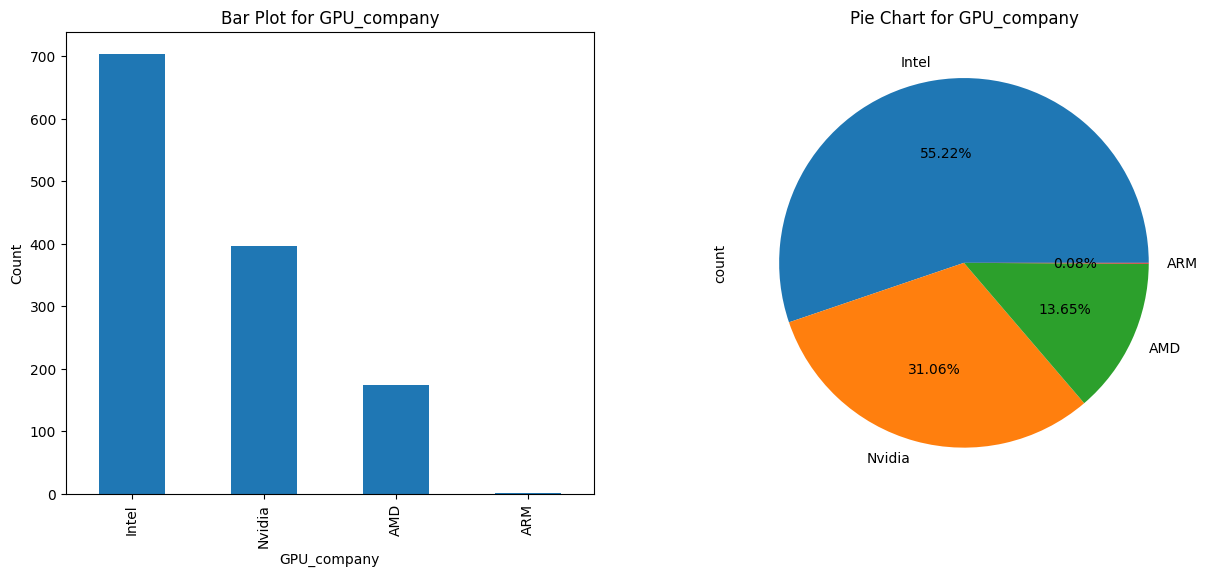

In [99]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for GPU_company")
plt.ylabel("Count")
df['GPU_company'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for GPU_company")
df['GPU_company'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.show()

**Observation**
- Here the Top GPU company is Intel (55%)
- then Nvidia (31%)
- then AMD (13.6%)
- then ARM (0.08%)

In [100]:
########### GPU_model ############

In [101]:
df['GPU_model'].dtype

dtype('O')

In [102]:
df['GPU_model'].value_counts()

GPU_model
HD Graphics 620     279
HD Graphics 520     181
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
                   ... 
Quadro M500M          1
Radeon R7 M360        1
Quadro M3000M         1
GeForce 960M          1
Mali T860 MP4         1
Name: count, Length: 110, dtype: int64

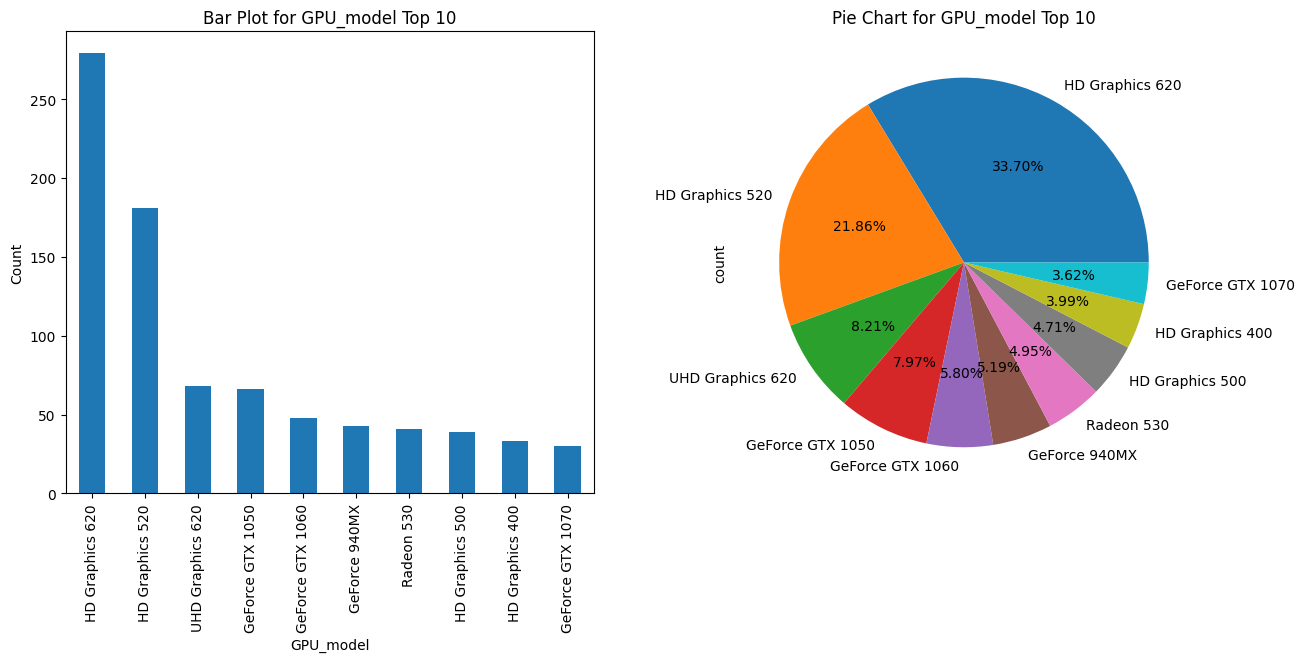

In [103]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Bar Plot for GPU_model Top 10")
plt.ylabel("Count")
df['GPU_model'].value_counts()[:10].plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Pie Chart for GPU_model Top 10")
df['GPU_model'].value_counts()[:10].plot(kind='pie', autopct='%.2f%%')

plt.show()

In [104]:
### Creating a copy of DataFrame
df_copy = df.copy()

In [105]:
df_copy

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


## Indepennt features and Target Feature

In [106]:
X = df.drop('Price_euros',axis=1)
y = df['Price_euros']

In [107]:
X

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,Full HD,1920,1080,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,Quad HD+,3200,1800,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,Standard,1366,768,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,Standard,1366,768,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [108]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

In [109]:
X.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [110]:
X['GPU_company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [111]:
len(X.columns)

22

In [112]:
cat_col_list = [feature for feature in X.columns if X[feature].dtype=='O'] ## list of categorical features
num_col_list = [feature for feature in X.columns if X[feature].dtype!='O'] ## list of numerical features

In [113]:
cat_col_list

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [114]:
num_col_list

['Inches',
 'Ram',
 'Weight',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

In [115]:
## Preprocessing of Data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [116]:
from sklearn.compose import ColumnTransformer
## importing column transformer

In [117]:
ohe_transformer = ColumnTransformer(transformers=[
    ('ohe_trnf',OneHotEncoder(sparse_output=False,drop='first'),cat_col_list)
],remainder='passthrough')

In [118]:
X = ohe_transformer.fit_transform(X) ## transforming 'X'

In [119]:
### Creating a copy of DataFrame 'X'
X_copy = X.copy()

In [120]:
# X = pd.get_dummies(X,columns=cat_col_list,drop_first=True,dtype=int)

In [121]:
X

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.300e+00, 1.280e+02,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.800e+00, 1.280e+02,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+00, 2.560e+02,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.600e+00, 6.400e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+00, 1.024e+03,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.600e+00, 5.000e+02,
        0.000e+00]], shape=(1275, 874))

## Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
# X['Touchscreen'] = X['Touchscreen'].map({'Yes':1,'No':0})
# X['IPSpanel'] = X['IPSpanel'].map({'Yes':1,'No':0})
# X['RetinaDisplay'] = X['RetinaDisplay'].map({'Yes':1,'No':0})

In [125]:
X_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+00, 2.560e+02,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.800e+00, 5.120e+02,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.300e+00, 2.560e+02,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.700e+00, 2.048e+03,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.500e+00, 1.024e+03,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.440e+00, 6.400e+01,
        0.000e+00]], shape=(1020, 874))

In [126]:
y_train

413      789.01
778     2899.00
1107     867.00
96       599.90
309      469.00
         ...   
1044    1000.00
1095     799.00
1130     629.00
860      850.66
1126     479.00
Name: Price_euros, Length: 1020, dtype: float64

In [127]:
scaler = StandardScaler()

In [128]:
## using standard scaling for the algorithm which require it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_train_scaled

array([[-0.13018891, -0.36858847, -0.05431254, ...,  0.40375092,
        -0.52820842, -0.42335546],
       [-0.13018891, -0.36858847, -0.05431254, ...,  0.99659055,
         0.17460528, -0.42335546],
       [-0.13018891, -0.36858847, -0.05431254, ...,  0.00852449,
        -0.52820842, -0.42335546],
       ...,
       [-0.13018891, -0.36858847, -0.05431254, ...,  0.79897734,
         4.39148746, -0.42335546],
       [-0.13018891, -0.36858847, -0.05431254, ...,  0.40375092,
         1.58023267, -0.42335546],
       [-0.13018891, -0.36858847, -0.05431254, ..., -1.69094913,
        -1.05531869, -0.42335546]], shape=(1020, 874))

In [130]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,864,865,866,867,868,869,870,871,872,873
0,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,-0.528961,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,-1.194933,-0.060972,-0.651198,0.038594,0.020878,0.403751,-0.528208,-0.423355
1,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,-0.528961,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,-0.704288,1.513485,-0.119813,0.038594,0.020878,0.996591,0.174605,-0.423355
2,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,-0.528961,-0.031327,-0.044324,1.817635,...,-0.062746,-0.231774,0.417185,-0.848200,0.107923,0.038594,0.020878,0.008524,-0.528208,-0.423355
3,-0.130189,-0.368588,-0.054313,1.842974,-0.054313,-0.044324,-0.528961,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,0.417185,-0.060972,0.259747,0.038594,0.020878,0.798977,1.580233,-0.423355
4,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,1.890500,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,0.417185,-0.848200,-0.256455,0.038594,0.020878,-0.584315,1.580233,-0.423355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,1.890500,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,-0.704288,-0.848200,-0.742293,0.038594,0.020878,0.008524,0.141661,-0.423355
1016,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,-0.528961,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,0.417185,-0.060972,0.563396,0.038594,0.020878,0.403751,-0.528208,2.113397
1017,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,1.890500,-0.031327,-0.044324,-0.550165,...,-0.062746,-0.231774,0.417185,-0.060972,0.016829,-1.049652,-1.045929,0.798977,4.391487,-0.423355
1018,-0.130189,-0.368588,-0.054313,-0.542601,-0.054313,-0.044324,-0.528961,-0.031327,-0.044324,1.817635,...,-0.062746,-0.231774,0.417185,-0.060972,0.411572,0.038594,0.020878,0.403751,1.580233,-0.423355


In [131]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [132]:
## importing all possible algorithms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR


In [133]:
# Creating a function to evaluate the model
def evaluate_model(true, predicted):
    R2_score=r2_score(true, predicted)
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mse)

    print("R2 Score:{:.2f}".format(R2_score))
    print("MAE:{:.2f}".format(mae))
    print("MSE:{:.2f}".format(mse))
    print("RMSE:{:.2f}".format(rmse))

## Model Training

In [134]:
## Model Training
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressor":SVR(),
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)

    y_train_pred=model.predict(X_train_scaled)
    y_test_pred=model.predict(X_test_scaled)

    print(list(models.keys())[i],"============>")
    print("Evaluating Train Dataset")
    evaluate_model(y_train,y_train_pred)
    print()
    print("Evaluating Test Dataset")
    evaluate_model(y_test,y_test_pred)
    print()
    print(f"\n{'-'*50}\n")

Linear Regression ============>
Evaluating Train Dataset
R2 Score:0.98
MAE:50.34
MSE:9557.61
RMSE:97.76

Evaluating Test Dataset
R2 Score:-7.00
MAE:462.51
MSE:3972538.00
RMSE:1993.12


--------------------------------------------------

Lasso ============>
Evaluating Train Dataset
R2 Score:0.98
MAE:68.74
MSE:11795.05
RMSE:108.61

Evaluating Test Dataset
R2 Score:0.89
MAE:160.53
MSE:57022.41
RMSE:238.79


--------------------------------------------------

Ridge ============>
Evaluating Train Dataset
R2 Score:0.98
MAE:50.69
MSE:9592.79
RMSE:97.94

Evaluating Test Dataset
R2 Score:0.84
MAE:204.77
MSE:78365.02
RMSE:279.94


--------------------------------------------------

K Neighbors Regressor ============>
Evaluating Train Dataset
R2 Score:0.76
MAE:216.98
MSE:115520.99
RMSE:339.88

Evaluating Test Dataset
R2 Score:0.69
MAE:263.77
MSE:153263.99
RMSE:391.49


--------------------------------------------------

Support Vector Regressor ============>
Evaluating Train Dataset
R2 Score:-0.0

## Here the best score is of *Lasso*

In [135]:
## Using Ensemble Techniques

models={
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    print(list(models.keys())[i],"============>")
    print("Evaluating Train Dataset")
    evaluate_model(y_train,y_train_pred)
    print()
    print("Evaluating Test Dataset")
    evaluate_model(y_test,y_test_pred)
    print()
    print(f"\n{'-'*50}\n")

Decision Tree Regressor ============>
Evaluating Train Dataset
R2 Score:1.00
MAE:1.67
MSE:170.46
RMSE:13.06

Evaluating Test Dataset
R2 Score:0.74
MAE:240.15
MSE:126607.20
RMSE:355.82


--------------------------------------------------

Random Forest Regressor ============>
Evaluating Train Dataset
R2 Score:0.98
MAE:65.34
MSE:12105.41
RMSE:110.02

Evaluating Test Dataset
R2 Score:0.87
MAE:169.84
MSE:64958.80
RMSE:254.87


--------------------------------------------------

Gradient Boosting Regressor ============>
Evaluating Train Dataset
R2 Score:0.91
MAE:158.01
MSE:42492.02
RMSE:206.14

Evaluating Test Dataset
R2 Score:0.88
MAE:192.30
MSE:61130.11
RMSE:247.25


--------------------------------------------------

Ada Boost Regressor ============>
Evaluating Train Dataset
R2 Score:0.67
MAE:351.74
MSE:162128.15
RMSE:402.65

Evaluating Test Dataset
R2 Score:0.65
MAE:357.21
MSE:172752.03
RMSE:415.63


--------------------------------------------------



## Here the best score is of *Random Forest Regressor*

In [136]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

print("Evaluating Train Dataset")
evaluate_model(y_train,y_train_pred)
print()
print("Evaluating Test Dataset")
evaluate_model(y_test,y_test_pred)
print()
print(f"\n{'-'*50}\n")

Evaluating Train Dataset
R2 Score:0.97
MAE:65.27
MSE:12972.55
RMSE:113.90

Evaluating Test Dataset
R2 Score:0.87
MAE:171.24
MSE:63311.64
RMSE:251.62


--------------------------------------------------



In [137]:
rf

RandomForestRegressor()

In [138]:
df_copy

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [139]:
cat_col_list

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [140]:
import pickle

In [ ]:
pickle.dump(rf,open('models/model.pkl','wb'))
pickle.dump(df_copy,open('models/dataframe.pkl','wb'))
pickle.dump(cat_col_list,open('models/cat_col_list.pkl','wb'))
pickle.dump(ohe_transformer,open('models/preprocessor.pkl','wb'))